## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
### 1. 머신러닝 (50점)

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [172]:
hotel = pd.read_csv('./ADP_book_ver01/data/hotel_bookings.csv')
hotel

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [173]:
cat_col = ['is_repeated_guest', 'deposit_type']
num_col = hotel.columns.difference(cat_col + ['is_canceled'])

In [174]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [175]:
print('데이터의 개수는 총 20,000개이며, 종속변수를 포함하여 총 11개의 변수가 존재한다.')
print('대부분의 변수는 수치형(int/float)으로 제시되어 있지만, 범주형 변수로 판단하고 진행해야 하는 컬럼이 있다.')
print('범주형 변수는 is_repeated_guest와 deposit_type, 그리고 종속변수인 is_canceled이며, 나머지 변수는 수치형 변수이다.')

데이터의 개수는 총 20,000개이며, 종속변수를 포함하여 총 11개의 변수가 존재한다.
대부분의 변수는 수치형(int/float)으로 제시되어 있지만, 범주형 변수로 판단하고 진행해야 하는 컬럼이 있다.
범주형 변수는 is_repeated_guest와 deposit_type, 그리고 종속변수인 is_canceled이며, 나머지 변수는 수치형 변수이다.


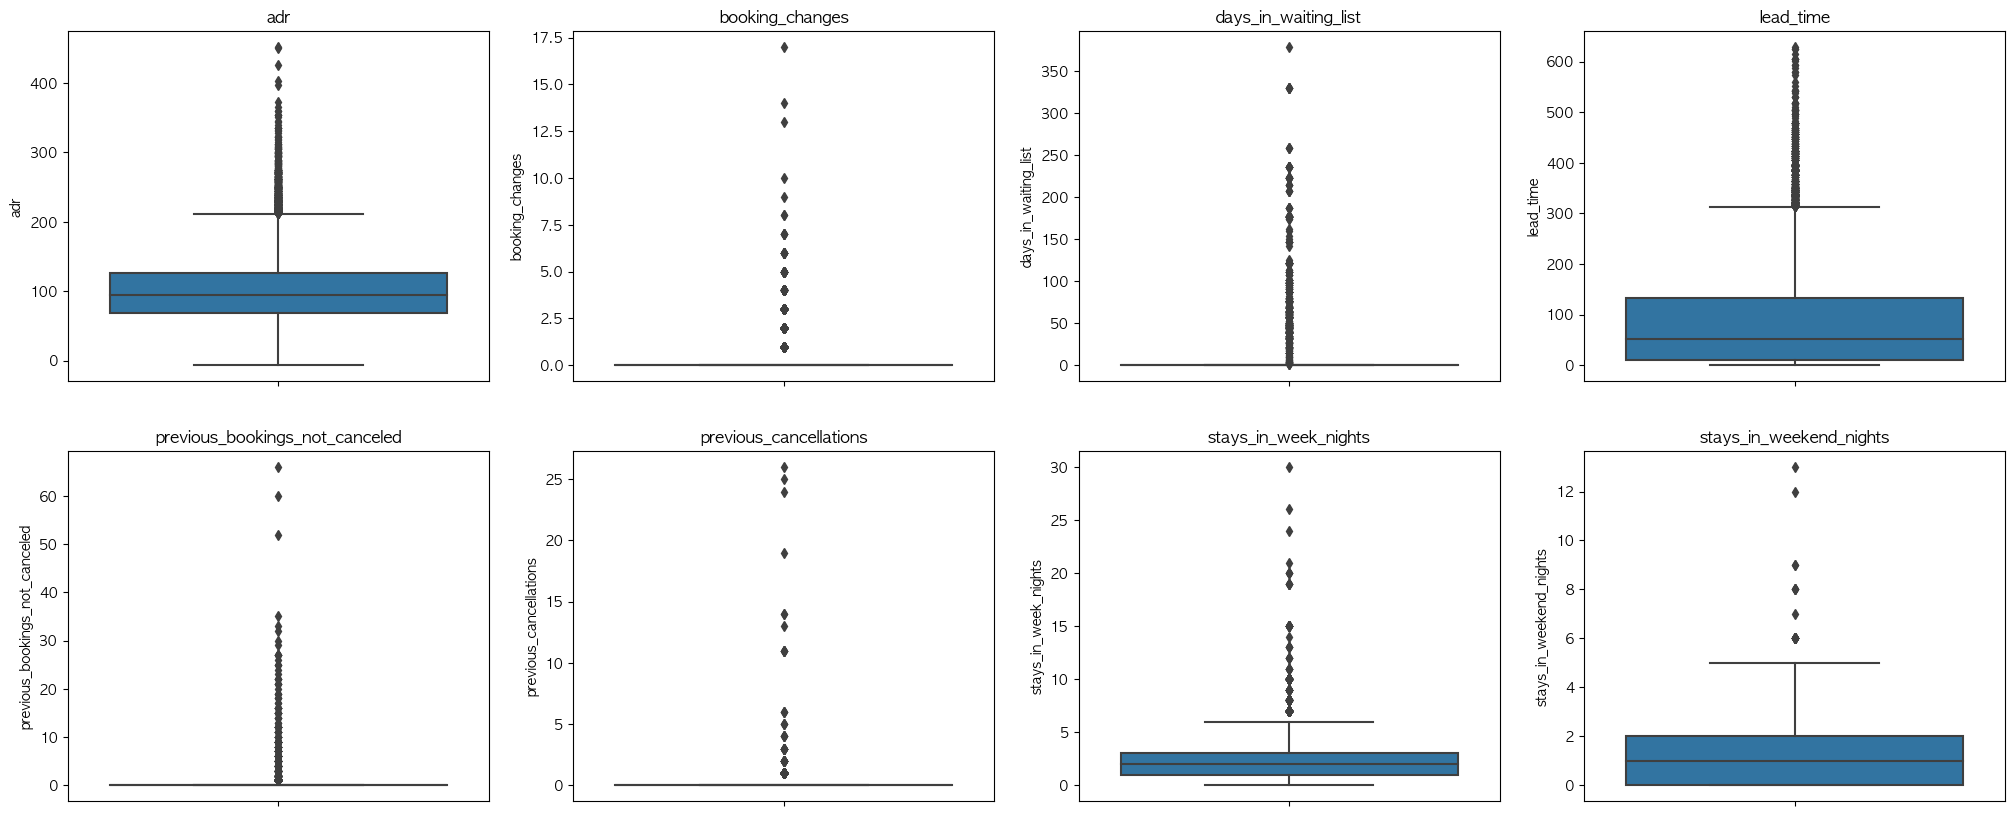

In [176]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
for i, col in enumerate(num_col):
    row_ = i//4
    col_ = i%4

    ax = axes[row_][col_]
    sns.boxplot(y=col, data=hotel, ax=ax)
    ax.set_title(col)

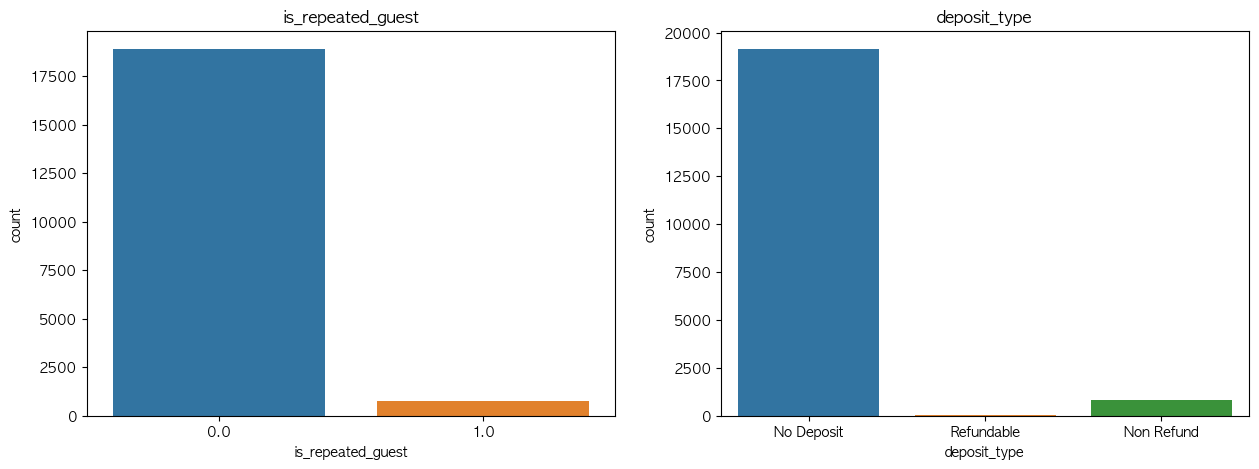

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, col in enumerate(cat_col):
    ax = axes[i]
    sns.countplot(x=col, data=hotel, ax=ax)
    ax.set_title(col)

In [178]:
print('수치형 변수들의 분포를 확인해 보니, 모든 변수에서 이상치가 확인되었다.')
print('범주형 변수들 역시 데이터의 불균형이 존재하는 것으로 보인다.')

수치형 변수들의 분포를 확인해 보니, 모든 변수에서 이상치가 확인되었다.
범주형 변수들 역시 데이터의 불균형이 존재하는 것으로 보인다.


#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [179]:
hotel.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [180]:
from sklearn.impute import KNNImputer

In [181]:
hotel = hotel[hotel.lead_time.notna()]
hotel.loc[hotel.is_repeated_guest.isna(), 'is_repeated_guest'] = 0

imputer = KNNImputer()
hotel['adr'] = imputer.fit_transform(hotel.loc[:, num_col])

/var/folders/1m/4rsksycx3qvf5nrg_td3lpxw0000gn/T/ipykernel_50197/1934537788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['adr'] = imputer.fit_transform(hotel.loc[:, num_col])


In [182]:
hotel.isnull().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

In [183]:
print('lead_time과 is_repeated_guest, adr 변수에 결측치가 존재한다.')
print('lead_time 변수는 전체 데이터 숫자에 비해 매우 적은 값에 결측치가 있으므로, 삭제하더라도 모델에 큰 영향이 없을 것으로 판단되므로, 제거한다.')
print('is_repeated_guest 변수의 경우, 분포를 살펴보니 0(재방문 아님) 값이 훨씬 많으며, 결측치가 확실히 재방문이라는 단서가 존재하지 않기 때문에 0으로 결측치를 보정한다.')
print('adr 변수는 수치형 변수이므로, KNN Imputer를 사용, 다른 수치형 변수와 함께 고려하여 결측치를 보정한다.')
print('모든 결측치를 제거한 후, 결측치가 없음을 확인하였다.')

lead_time과 is_repeated_guest, adr 변수에 결측치가 존재한다.
lead_time 변수는 전체 데이터 숫자에 비해 매우 적은 값에 결측치가 있으므로, 삭제하더라도 모델에 큰 영향이 없을 것으로 판단되므로, 제거한다.
is_repeated_guest 변수의 경우, 분포를 살펴보니 0(재방문 아님) 값이 훨씬 많으며, 결측치가 확실히 재방문이라는 단서가 존재하지 않기 때문에 0으로 결측치를 보정한다.
adr 변수는 수치형 변수이므로, KNN Imputer를 사용, 다른 수치형 변수와 함께 고려하여 결측치를 보정한다.
모든 결측치를 제거한 후, 결측치가 없음을 확인하였다.


#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오

In [188]:
print('앞서 확인된 수치형 변수들에서의 이상치 처리가 필요하다. 이상치 제거는 현업과 함께 판단해야 하는 사안이므로 우선은 이상치의 영향을 줄이기 위한 작업을 수행한다.')
print('booking_changes, days_in_waiting_list, previous_bookings_not_canceled, previous_cancellations 변수는 boxplot 모양을 봤을 때 IQR이 0에 가까우므로, 범주형 변수로 변환한다.')
print('adr, lead_time, stays_in_week_nights, stays_in_weekend_nights 변수는 로그 변환을 진행한다. 로그 변환시 음수 처리를 위해, 각 변수의 최소값을 빼서 모든 값이 양수가 되도록 하였다.')
print('또한, 범주형 데이터의 불균형은 모델링 시 성능 저하의 원인이 되는데, deposit_type 변수의 카테고리를 2개(No deposit=0, else 1)로 통합하여 불균형을 일부 완화하였다.')

앞서 확인된 수치형 변수들에서의 이상치 처리가 필요하다. 이상치 제거는 현업과 함께 판단해야 하는 사안이므로 우선은 이상치의 영향을 줄이기 위한 작업을 수행한다.
booking_changes, days_in_waiting_list, previous_bookings_not_canceled, previous_cancellations 변수는 boxplot 모양을 봤을 때 IQR이 0에 가까우므로, 범주형 변수로 변환한다.
adr, lead_time, stays_in_week_nights, stays_in_weekend_nights 변수는 로그 변환을 진행한다. 로그 변환시 음수 처리를 위해, 각 변수의 최소값을 빼서 모든 값이 양수가 되도록 하였다.
또한, 범주형 데이터의 불균형은 모델링 시 성능 저하의 원인이 되는데, deposit_type 변수의 카테고리를 2개(No deposit=0, else 1)로 통합하여 불균형을 일부 완화하였다.


In [189]:
hotel.loc[:, 'deposit_type'] = np.where(hotel['deposit_type']=="No Deposit", 0, 1)

for col in ['booking_changes', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'previous_cancellations']:
    hotel.loc[:, col] = np.where(hotel.loc[:, col] > 0, 1, 0)

for col in ['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights']:
    hotel.loc[:, col] = np.log1p(hotel[col] - hotel[col].min())

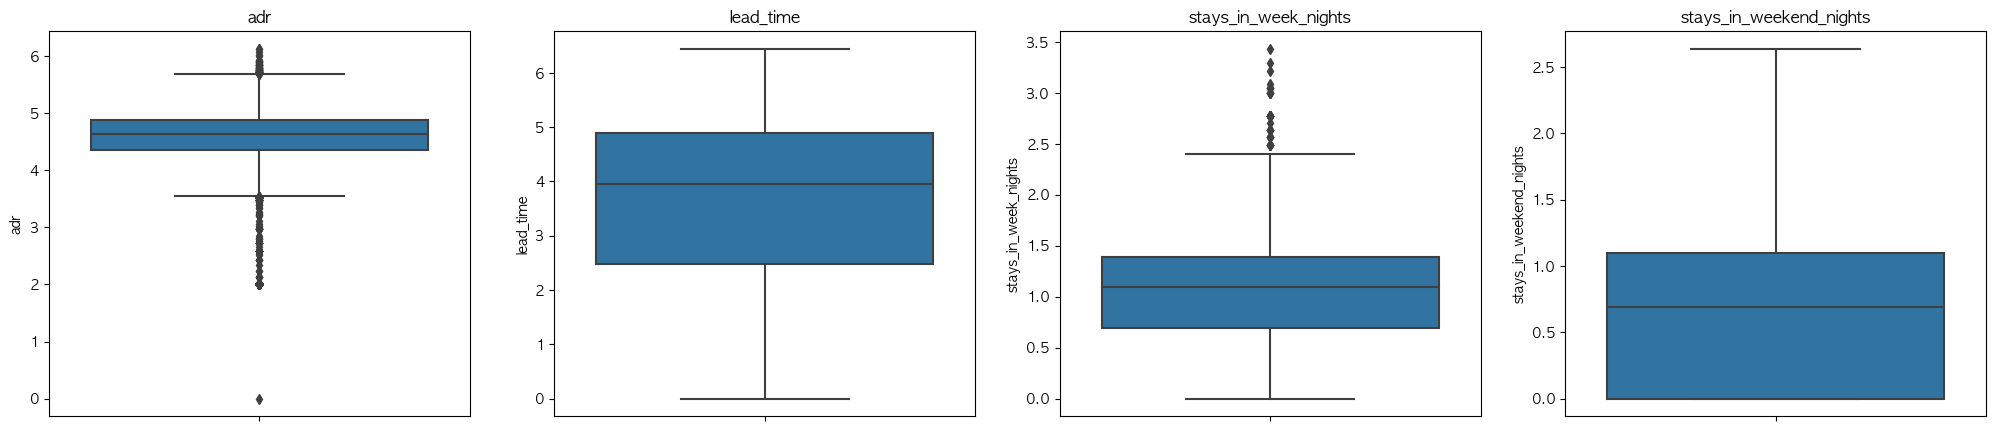

In [190]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))
for i, col in enumerate(['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights']):
    ax = axes[i]
    sns.boxplot(y=col, data=hotel, ax=ax)
    ax.set_title(col)

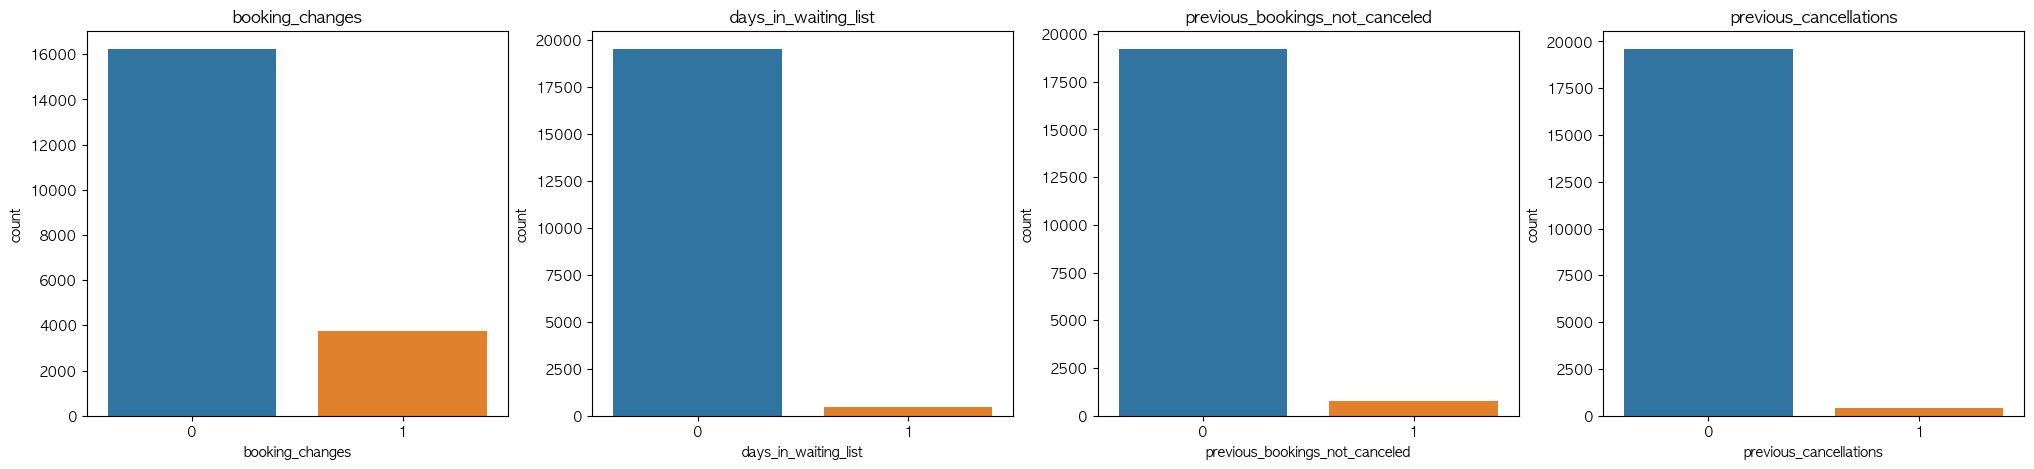

In [191]:
fig, axes = plt.subplots(ncols=4, figsize=(25, 5))
for i, col in enumerate(['booking_changes', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'previous_cancellations']):
    ax = axes[i]
    sns.countplot(x=col, data=hotel, ax=ax)
    ax.set_title(col)

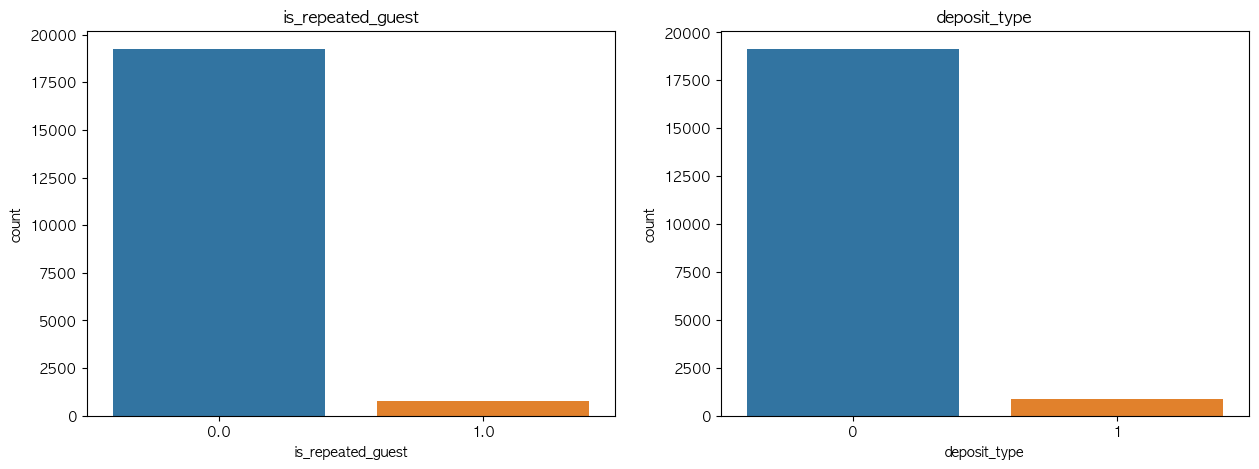

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, col in enumerate(cat_col):
    ax = axes[i]
    sns.countplot(x=col, data=hotel, ax=ax)
    ax.set_title(col)

In [193]:
print('로그 변환을 적용한 변수들의 분포를 boxplot으로 확인해 본 결과, 이상치의 개수가 현저하게 감소한 것을 확인할 수 있다.')
print('범주형 변수로 변환한 변수들은 변환의 영향으로 이상치가 제거되었으며, deposit_type 변수의 클래스 불균형이 완화되었다.')

로그 변환을 적용한 변수들의 분포를 boxplot으로 확인해 본 결과, 이상치의 개수가 현저하게 감소한 것을 확인할 수 있다.
범주형 변수로 변환한 변수들은 변환의 영향으로 이상치가 제거되었으며, deposit_type 변수의 클래스 불균형이 완화되었다.


#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

<Axes: xlabel='is_canceled', ylabel='count'>

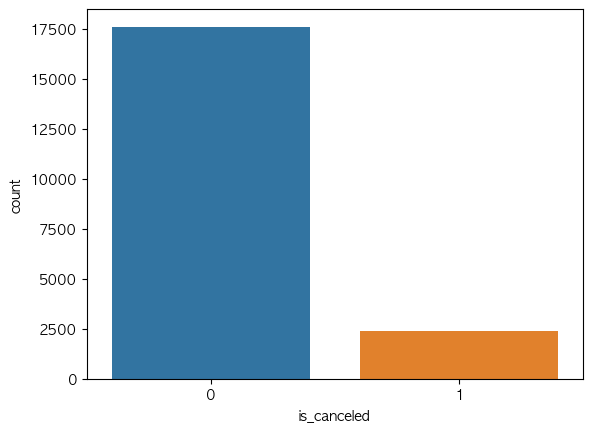

In [194]:
sns.countplot(x='is_canceled', data=hotel)

In [195]:
print('종속 변수의 범주 별 count를 시각화해 보면 막대 그래프의 길이가 크게 다른 것을 확인할 수 있고, 이는 데이터 범주의 개수가 같지 않음을 시사한다.')

종속 변수의 범주 별 count를 시각화해 보면 막대 그래프의 길이가 크게 다른 것을 확인할 수 있고, 이는 데이터 범주의 개수가 같지 않음을 시사한다.


#### (5) 오버 샘플링 기법을 설명하고 비교한 뒤, 2개 기법을 선정하고 근거를 제시하시오.

In [196]:
print('오버 샘플링은 개수가 적은 카테고리의 데이터를 sampling을 통해 생성하여, 큰 카테고리의 데이터 개수와 맞추는 기법이다. 적은 카테고리의 데이터 수에 맞추는 언더 샘플링보다 보통 성능이 더 좋기 때문에 자주 사용된다.')
print('랜덤 오버 샘플링은, 개수가 적은 카테고리 데이터를 랜덤 복원추출하는 방법이며, SMOTE는 S소수 레이블의 값과 K-NN 사이에 임의의 새로운 데이터 생성하는 방법이다.')
print('랜덤 오버 샘플링은 자가 복제 방식이기 때문에 상대적으로 빠르지만, 같은 데이터가 여러 개 생성되므로 overfitting의 위험이 있다. SMOTE는 소수 클래스의 Recall 상승에 최적이지만 랜덤 Over-sampling보다 시간 소요가 긴 편이다.')
print('또한, SMOTE 기법은 K-NN 알고리즘 기반이므로 수치형 데이터에만 적용이 가능한데, 이 경우에는 Categorical Data가 섞여 있으므로, SMOTENC 기법을 사용한다.')

오버 샘플링은 개수가 적은 카테고리의 데이터를 sampling을 통해 생성하여, 큰 카테고리의 데이터 개수와 맞추는 기법이다. 적은 카테고리의 데이터 수에 맞추는 언더 샘플링보다 보통 성능이 더 좋기 때문에 자주 사용된다.
랜덤 오버 샘플링은, 개수가 적은 카테고리 데이터를 랜덤 복원추출하는 방법이며, SMOTE는 S소수 레이블의 값과 K-NN 사이에 임의의 새로운 데이터 생성하는 방법이다.
랜덤 오버 샘플링은 자가 복제 방식이기 때문에 상대적으로 빠르지만, 같은 데이터가 여러 개 생성되므로 overfitting의 위험이 있다. SMOTE는 소수 클래스의 Recall 상승에 최적이지만 랜덤 Over-sampling보다 시간 소요가 긴 편이다.
또한, SMOTE 기법은 K-NN 알고리즘 기반이므로 수치형 데이터에만 적용이 가능한데, 이 경우에는 Categorical Data가 섞여 있으므로, SMOTENC 기법을 사용한다.


#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [161]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

from collections import Counter

In [197]:
x = hotel.drop('is_canceled', axis=1)
y = hotel['is_canceled']

In [199]:
oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 17595, 1: 17595})


In [204]:
cat_col = cat_col + ['booking_changes', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'previous_cancellations']

oversample = SMOTENC(categorical_features=cat_col)
x_smote, y_smote = oversample.fit_resample(x, y)
print(Counter(y_smote))

Counter({0: 17595, 1: 17595})


In [205]:
print('원본 데이터를 독립 변수(x)와 종속 변수(y)로 구분하였다. 범주형 변수들은 모두 이진 변수이고, 수치형으로 인코딩 되어 있으므로 별도의 인코딩 과정은 진행하지 않았다.')
print('오버 샘플링 기법으로는 랜덤 오버 샘플링과 SMOTENC를 선정하였다. 랜덤 오버 샘플링은 빠르게 오버 샘플링을 적용해볼 수 있는 점에서 선정하였고, SMOTENC는 랜덤 오버 샘플링의 과적합 위험성을 줄여줄 수 있다는 점에서 선정하였다.')
print('오버 샘플링 데이터의 경우, 종속 변수의 클래스 별 데이터 수가 17,595개로 동일한 것을 확인할 수 있다.')

원본 데이터를 독립 변수(x)와 종속 변수(y)로 구분하였다. 범주형 변수들은 모두 이진 변수이고, 수치형으로 인코딩 되어 있으므로 별도의 인코딩 과정은 진행하지 않았다.
오버 샘플링 기법으로는 랜덤 오버 샘플링과 SMOTENC를 선정하였다. 랜덤 오버 샘플링은 빠르게 오버 샘플링을 적용해볼 수 있는 점에서 선정하였고, SMOTENC는 랜덤 오버 샘플링의 과적합 위험성을 줄여줄 수 있다는 점에서 선정하였다.
오버 샘플링 데이터의 경우, 종속 변수의 클래스 별 데이터 수가 17,595개로 동일한 것을 확인할 수 있다.


#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [223]:
import time
import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [224]:
models = {"Original": [x, y], "Random over": [x_over, y_over], "SMOTE": [x_smote, y_smote]}

for k, v in models.items():
    print(k)
    x_train, x_test, y_train, y_test = train_test_split(v[0], v[1], test_size=0.2, stratify=v[1])

    start = time.time() # 시작
    clf.fit(x_train, y_train)

    pred = clf.predict(x_test)
    print("Accu:", accuracy_score(pred, y_test))
    print("F1:", f1_score(pred, y_test))
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test))
    sec = time.time() - start # 종료 - 시작 (걸린 시간)

    times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
    short = times.split(".")[0] # 초 단위 까지만
    print(f"{times} sec")
    print(f"{short} sec")
    print("")

Original
Accu: 0.921730432608152
F1: 0.5694635488308116
[[3479  273]
 [  40  207]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3752
           1       0.43      0.84      0.57       247

    accuracy                           0.92      3999
   macro avg       0.71      0.88      0.76      3999
weighted avg       0.95      0.92      0.93      3999

0:00:00.957852 sec
0:00:00 sec

Random over
Accu: 0.9663256606990622
F1: 0.9671699681396314
[[3310   28]
 [ 209 3491]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3338
           1       0.99      0.94      0.97      3700

    accuracy                           0.97      7038
   macro avg       0.97      0.97      0.97      7038
weighted avg       0.97      0.97      0.97      7038

0:00:01.508651 sec
0:00:01 sec

SMOTE
Accu: 0.8897414038079
F1: 0.8891428571428571
[[3150  407]
 [ 369 3112]]
              precision    recall 

In [226]:
print('각 샘플링 모델의 성능을 측정하기 위해, Random Forest 알고리즘을 사용하여 모델링을 수행하였다.')
print('정확도 측면에서는 랜덤 오버 샘플링을, 선정하였다. 랜덤 오버 샘플링이 test set에서의 정확도, F1-score 모두에서 다른 모델 대비 좋은 성능을 보여주었기 때문이다. 모델링 속도는 데이터 개수가 적은 원본 모델이 0.97초 수행시간으로 가장 빠른 속도를 보여주었지만, 이는 데이터 개수가 적기 때문이다.')
print('데이터의 개수를 고려했을 때, 속도 측면에서도 랜덤 오버 샘플링을 선정한다.')

각 샘플링 모델의 성능을 측정하기 위해, Random Forest 알고리즘을 사용하여 모델링을 수행하였다.
정확도 측면에서는 랜덤 오버 샘플링을, 선정하였다. 랜덤 오버 샘플링이 test set에서의 정확도, F1-score 모두에서 다른 모델 대비 좋은 성능을 보여주었기 때문이다. 모델링 속도는 데이터 개수가 적은 원본 모델이 0.97초 수행시간으로 가장 빠른 속도를 보여주었지만, 이는 데이터 개수가 적기 때문이다.
데이터의 개수를 고려했을 때, 속도 측면에서도 랜덤 오버 샘플링을 선정한다.


#### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

In [225]:
print('오버 샘플링을 적용하면, 소수 클래스를 대변하는 데이터 개수가 늘어나게 되고 그만큼 더 소수 데이터를 명확하게 분류해낼 수 있는 힘이 모델에 주어진다.')
print('원 데이터의 모델링에서 F1-score는 0.53에 그쳤지만, 오버 샘플링을 적용한 두 모델의 경우 소수 데이터의 precision과 recall 모두 증가하여 0.97 0.88로 크게 상승하였다.')

오버 샘플링을 적용하면, 소수 클래스를 대변하는 데이터 개수가 늘어나게 되고 그만큼 더 소수 데이터를 명확하게 분류해낼 수 있는 힘이 모델에 주어진다.
원 데이터의 모델링에서 F1-score는 0.53에 그쳤지만, 오버 샘플링을 적용한 두 모델의 경우 소수 데이터의 precision과 recall 모두 증가하여 0.97 0.88로 크게 상승하였다.


### 2. 통계분석 (50점)

#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

In [2]:
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14]

In [6]:
print('H0: 시제품의 농도 평균은 60이다.')
print('H1: 시제품의 농도 평균은 60이 아니다. (양측 검정)')
print('단일 집단에 대한 평균 검정을 시행한다. 먼저, 해당 집단이 정규성을 띄는 지 여부를 검정한다.')

H0: 시제품의 농도 평균은 60이다.
H1: 시제품의 농도 평균은 60이 아니다.
단일 집단에 대한 평균 검정을 시행한다. 먼저, 해당 집단이 정규성을 띄는 지 여부를 검정한다.


In [7]:
### Normality test
stats.shapiro(x) # not normal

ShapiroResult(statistic=0.965764582157135, pvalue=0.849041759967804)

In [8]:
print('Shapiro-wilk 테스트 결과, 검정통계량 0.97, p-value 0.85로 데이터가 정규성을 띈다는 귀무가설을 기각할 수 없다. 따라서 데이터가 정규 분포를 따른다는 가정을 할 수 있다. 그러므로, 평균 검정을 위해 T-test를 진행한다.')

Shapiro-wilk 테스트 결과, 검정통계량 0.97, p-value 0.85로 데이터가 정규성을 띈다는 귀무가설을 기각할 수 없다. 따라서 데이터가 정규 분포를 따른다는 가정을 할 수 있다. 그러므로, 평균 검정을 위해 T-test를 진행한다.


In [11]:
stats.ttest_1samp(x, popmean=60, alternative="two-sided")

Ttest_1sampResult(statistic=-2.099292080780179, pvalue=0.06519313277276138)

In [12]:
print('One sample T-test 결과, 검정 통계량 -2.1, p-value 0.07로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. 따라서, 시제품 농도의 평균은 60%가 아니라고 볼 통계적 근거가 없다.')

One sample T-test 결과, 검정 통계량 -2.1, p-value 0.07로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. 따라서, 시제품 농도의 평균은 60%가 아니라고 볼 통계적 근거가 없다.


#### 2. 코로나 시계열 데이터로 다음을 수행하시오.

In [14]:
covid = pd.read_csv('./ADP_book_ver01/data/서울특별시 코로나19.csv')
covid.head()

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [24]:
covid.shape[0]

(785, 27)

#### (1) ACF를 사용해서 distance를 계산하시오 

In [41]:
import platform
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    # import matplotlib.font_manager as fm
    # fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

In [22]:
from statsmodels.tsa.stattools import acf
from scipy.spatial import distance

In [ ]:
covid.sort_values('날짜', inplace=True)
covid.reset_index(inplace=True)

covid['날짜'] = pd.to_datetime(covid['날짜'], format="%Y-%m-%d")

acf_df = pd.DataFrame()
for col in covid.columns.difference(['index', '날짜']):
    acf_df[col] = acf(covid[col], nlags=covid.shape[0], fft=False)

In [34]:
print('먼저, 날짜 순서대로 데이터를 정렬한 다음, 날짜 변수는 날짜 형식으로 변환해 준다. 그리고 각 변수(자치구) 별로 첫 번째 값을 기준으로 ACF를 계산하여 새로운 데이터프레임을 생성한다.')

먼저, 날짜 순서대로 데이터를 정렬한 다음, 날짜 변수는 날짜 형식으로 변환해 준다. 그리고 각 변수(자치구) 별로 첫 번째 값을 기준으로 ACF를 계산하여 새로운 데이터프레임을 생성한다.


In [37]:
dist = acf_df.corr()
for col in dist.columns:
    for idx in dist.index:
        dist.loc[idx, col] = distance.euclidean(acf_df[idx], acf_df[col])

그 다음, 각 자치구를 순서쌍으로 하여 acf 값 사이의 euclidian distance를 계산하였다. 이를 heatmap으로 시각화하면 아래와 같다.


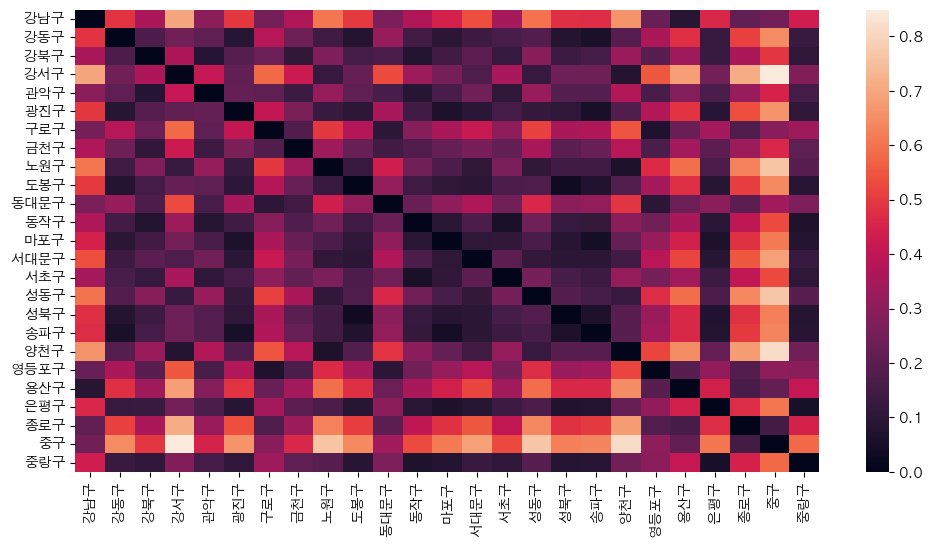

In [45]:
print('그 다음, 각 자치구를 순서쌍으로 하여 acf 값 사이의 euclidian distance를 계산하였다. 이를 heatmap으로 시각화하면 아래와 같다.')
plt.figure(figsize=(12, 6))
sns.heatmap(dist)
plt.show()

#### (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오

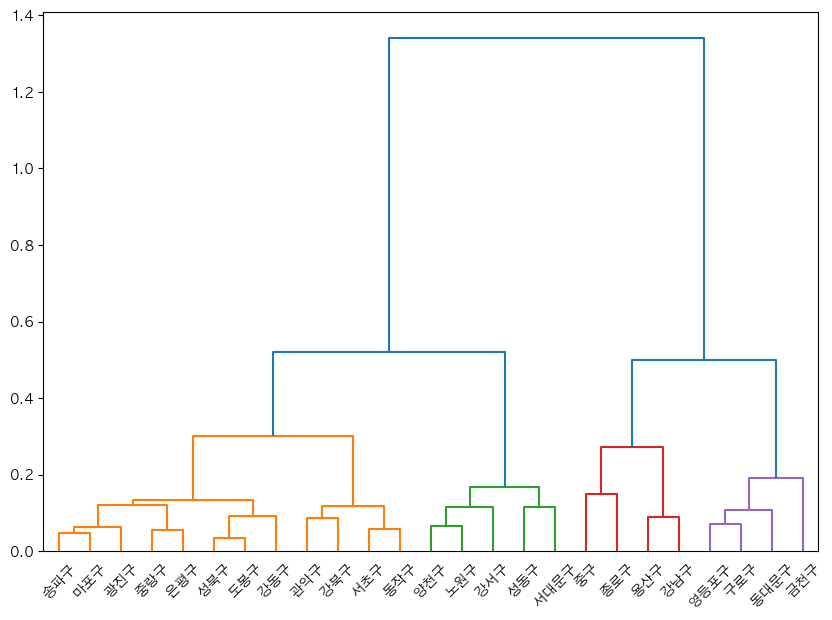

In [60]:
label_list = acf_df.T.index
### 와드연결법
# 최단연결법의 단점 보완. 군집 내 오차(SSE)에 기반한 거리 측정
# 상대적으로 계산량이 많지만, 해석력이 높음
ward = linkage(acf_df.T.iloc[:, 1::], metric='euclidean', method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=label_list,
            distance_sort='descending',
            color_threshold=0.4,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  # Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


In [61]:
print('각 자치구별 클러스터링을 진행하기 위해, acf dataframe을 전치하여 자치구가 index에 가도록 변경해 준 다음 덴드로그램을 작성하였다. 군집 간 거리 측정 방법은 해석력이 높은 와드를 사용하였다.')
print('거리 threshold를 0.4로 설정했을 때, 자치구가 크게 4개의 클러스터로 구분되는 것을 확인할 수 있다.')

각 자치구별 클러스터링을 진행하기 위해, acf dataframe을 전치하여 자치구가 index에 가도록 변경해 준 다음 덴드로그램을 작성하였다. 군집 간 거리 측정 방법은 해석력이 높은 와드를 사용하였다.
거리 threshold를 0.4로 설정했을 때, 자치구가 크게 4개의 클러스터로 구분되는 것을 확인할 수 있다.


#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [62]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
table

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


In [63]:
print('학과와 평점이 서로 관계가 있는지 (독립적인지) 확인하기 위해서는, 카이제곱 독립성 검정을 수행하면 된다.')
print('가설은 다음과 같다.')
print('H0: 학과와 평점은 관계가 없다 (독립적이다)')
print('H1: 학과와 평점은 관계가 있다 (독립이 아니다)')

학과와 평점이 서로 관계가 있는지 (독립적인지) 확인하기 위해서는, 카이제곱 독립성 검정을 수행하면 된다.
가설은 다음과 같다.
H0: 학과와 평점은 관계가 없다 (독립적이다)
H1: 학과와 평점은 관계가 있다 (독립이 아니다)


In [64]:
from scipy.stats import chi2_contingency

In [65]:
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

Statistic: 10.199441509990177
p-value: 0.03719883770303157
df: 4
expect: 
 [[19.33333333 11.66666667 15.        ]
 [26.47826087 15.97826087 20.54347826]
 [12.1884058   7.35507246  9.45652174]]


In [66]:
print('카이제곱 검정 결과, 검정통계량 10.2, p-value 0.04로 유의수준 0.05 하에서 귀무가설을 기각할 수 있다. 그러므로, 평점은 학과와 관계가 있다고 볼 통계적 근거가 충분하다.')

카이제곱 검정 결과, 검정통계량 10.2, p-value 0.04로 유의수준 0.05 하에서 귀무가설을 기각할 수 있다. 그러므로, 평점은 학과와 관계가 있다고 볼 통계적 근거가 충분하다.
